In [1]:
import os
from PIL import Image

yourpath = os.getcwd()
for file in os.listdir('prospace_assignment'):
        im = Image.open(os.path.join('prospace_assignment', file))
        im = im.convert('RGB')
        im.thumbnail(im.size)
        im.save('JPGfiles/' + file.split(".")[0] + ".jpg", "JPEG", quality=100)

In [1]:
import os
len(os.listdir('JPGfiles'))

6816

In [3]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

path = r"JPGfiles"
# change the working directory to the path where the images are located
# os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files

  # loops through each file in the directory
for file in os.listdir(path):
    flowers.append(file)
            
            
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467096/553467096 [==============================] - 134s 0us/step


In [6]:
len(flowers)

6816

In [14]:
path = r"JPGfiles"

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(os.path.join(path, file), target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   
data = {}
# p = r"FV"

# lop through each image in the dataset
index = 0
for flower in flowers:
    feat = extract_features(flower,model)
    data[flower] = feat
    index += 1

    if index % 100 == 0:
        print("processed ", index, " images")

1/1 [==============================] - 0s 140ms/step
processed  100  images
1/1 [==============================] - 0s 145ms/step
processed  200  images
1/1 [==============================] - 0s 132ms/step
processed  300  images
1/1 [==============================] - 0s 132ms/step
processed  400  images
1/1 [==============================] - 0s 121ms/step
processed  500  images
1/1 [==============================] - 0s 121ms/step
processed  600  images
1/1 [==============================] - 0s 127ms/step
processed  700  images
1/1 [==============================] - 0s 123ms/step
processed  800  images
1/1 [==============================] - 0s 127ms/step
processed  900  images
1/1 [==============================] - 0s 127ms/step
processed  1000  images
1/1 [==============================] - 0s 128ms/step
processed  1100  images
1/1 [==============================] - 0s 117ms/step
processed  1200  images
1/1 [==============================] - 0s 121ms/step
processed  1300  images
1/1 [===

In [15]:
data

{'100_2022_10.jpg': array([[0.       , 1.2734339, 1.3227646, ..., 0.       , 0.       ,
         0.744966 ]], dtype=float32),
 '100_2022_11.jpg': array([[0.        , 1.34761   , 1.3799527 , ..., 0.        , 0.        ,
         0.67911965]], dtype=float32),
 '100_2022_4.jpg': array([[0.        , 0.9200198 , 1.4198072 , ..., 0.        , 0.        ,
         0.66599387]], dtype=float32),
 '100_2022_5.jpg': array([[0.       , 1.0956708, 1.7607968, ..., 0.       , 0.       ,
         0.7641226]], dtype=float32),
 '100_2022_6.jpg': array([[0.        , 1.2419949 , 1.1201763 , ..., 0.        , 0.        ,
         0.88317406]], dtype=float32),
 '100_2022_7.jpg': array([[0.        , 1.1459495 , 1.1177144 , ..., 0.        , 0.        ,
         0.94579977]], dtype=float32),
 '100_2022_8.jpg': array([[0.        , 1.1878976 , 1.2446392 , ..., 0.12257087, 0.        ,
         0.67359865]], dtype=float32),
 '100_2022_9.jpg': array([[0.        , 1.4583002 , 1.3005643 , ..., 0.        , 0.        ,
 

In [16]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [26]:
# cluster feature vectors
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(os.path.join(path, file))
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

C:\Users\vinur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
groups

Clipping cluster size from 1434 to 30


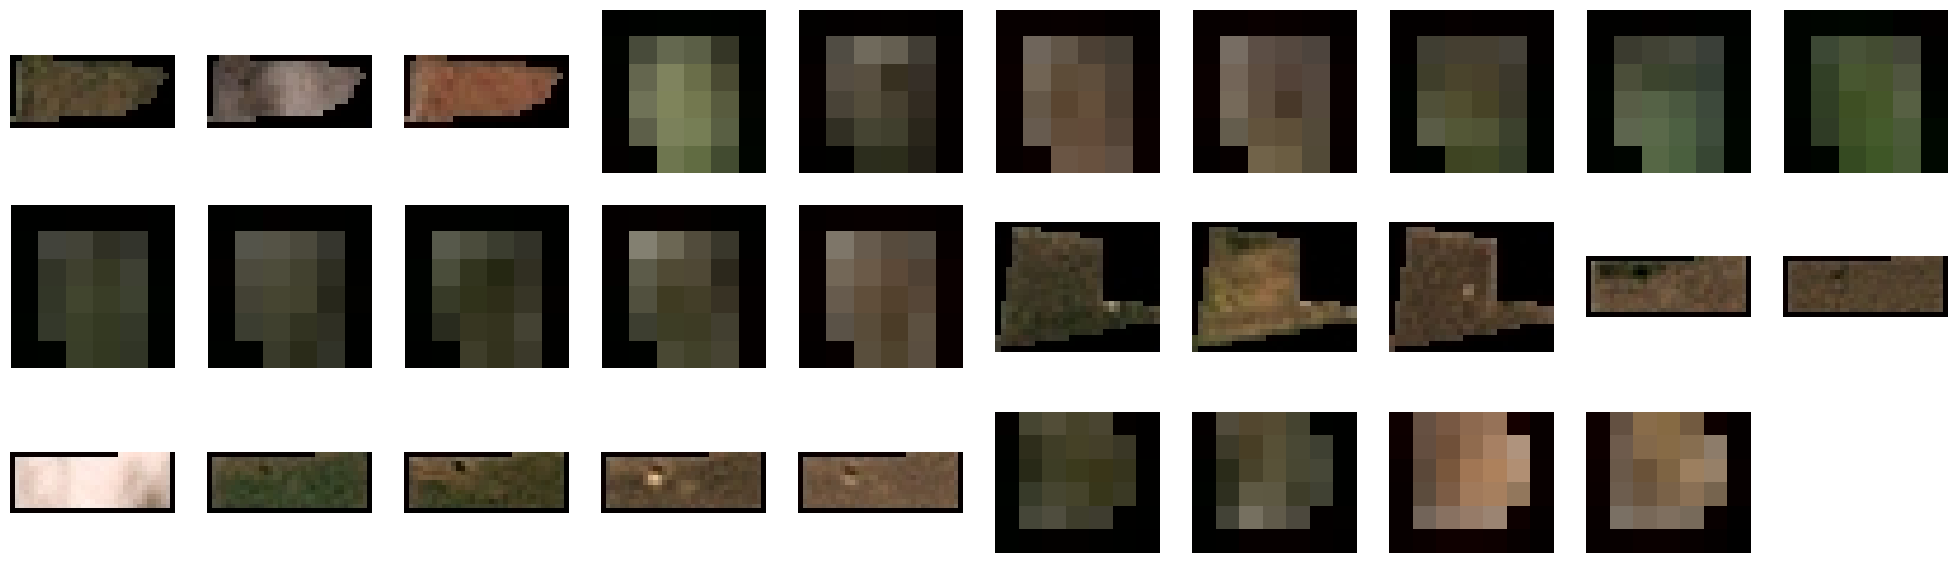

In [28]:
view_cluster(0)

Clipping cluster size from 2046 to 30


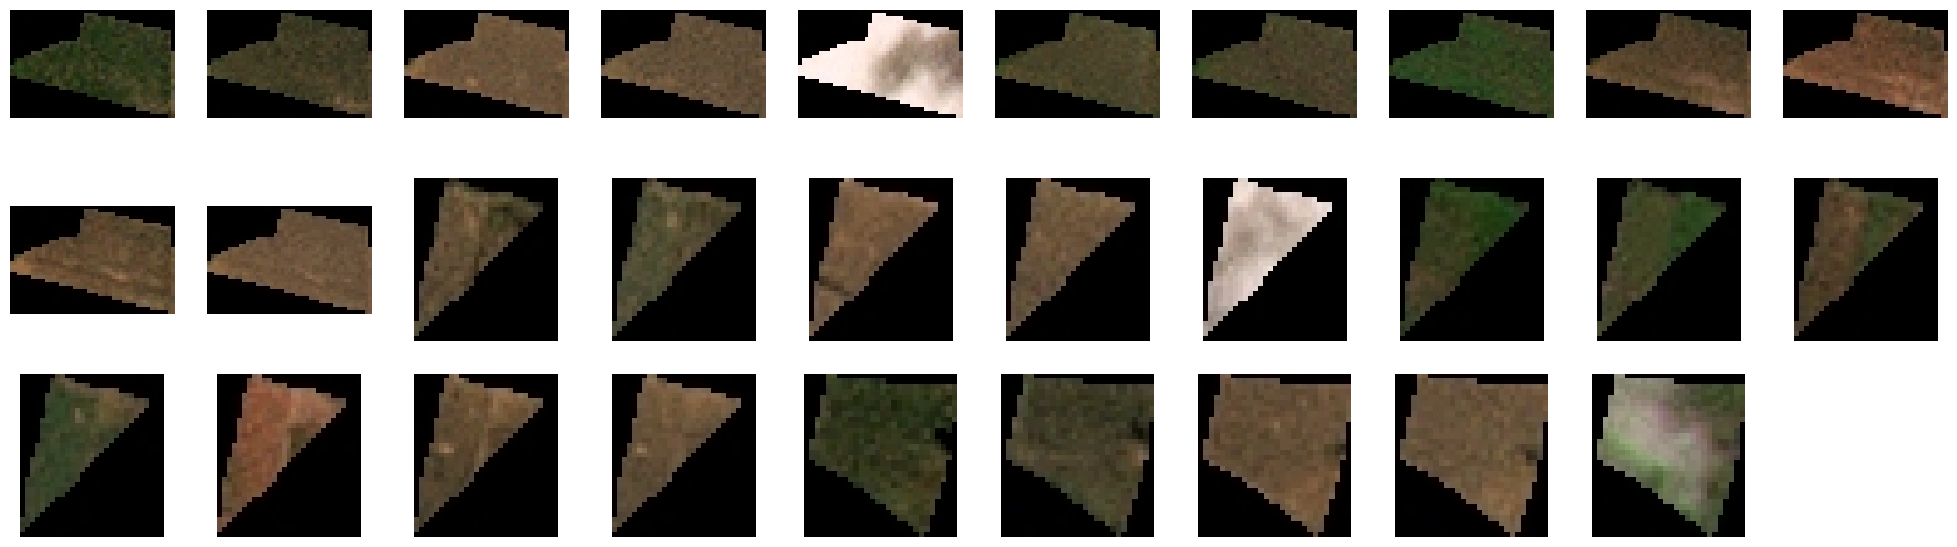

In [29]:
view_cluster(1)

Clipping cluster size from 3336 to 30


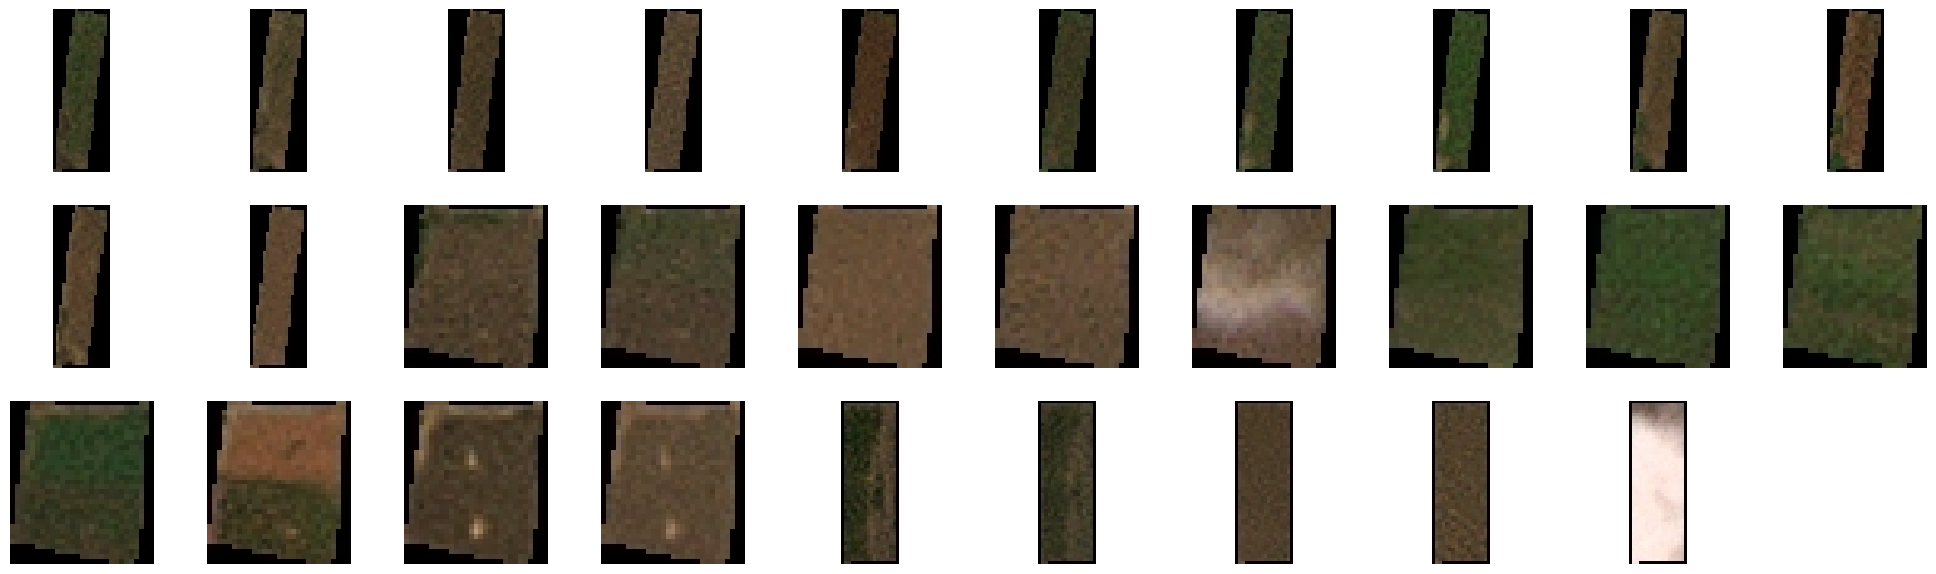

In [30]:
view_cluster(2)

In [107]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation="softmax"))



In [108]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 173056)           

In [100]:
train_data = []
test_data = []

for cluster in groups.keys():
    grp = groups[cluster]
    l = len(grp)
    split = int(l * 0.8)
    for file in grp[:split]:
        train_data.append((file, cluster))
    for file in grp[split:]:
        test_data.append((file, cluster))

In [101]:
import shutil

for file, label in train_data:
    src = os.path.join(path, file)
    dst = os.path.join('train', str(label), file)
    shutil.copyfile(src, dst)

In [102]:
import shutil

for file, label in test_data:
    src = os.path.join(path, file)
    dst = os.path.join('test', str(label), file)
    shutil.copyfile(src, dst)

In [103]:
from keras.preprocessing.image import ImageDataGenerator

In [104]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    directory=r"./train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    subset='training',
    seed=22
)

test_generator = test_datagen.flow_from_directory(
    directory=r"./test/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=22
)

Found 5451 images belonging to 3 classes.
Found 1365 images belonging to 3 classes.


In [111]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [88]:
x= train_generator.next()
print(x[0].shape)

(32, 224, 224, 3)


In [112]:
history = model.fit(train_generator, epochs=5)

Epoch 1/5
171/171 [==============================] - 201s 1s/step - loss: 0.8534 - accuracy: 0.6250
Epoch 2/5
171/171 [==============================] - 173s 1s/step - loss: 0.4726 - accuracy: 0.8046
Epoch 3/5
171/171 [==============================] - 171s 998ms/step - loss: 0.4198 - accuracy: 0.8217
Epoch 4/5
171/171 [==============================] - 169s 989ms/step - loss: 0.3854 - accuracy: 0.8387
Epoch 5/5
171/171 [==============================] - 169s 990ms/step - loss: 0.3521 - accuracy: 0.8498


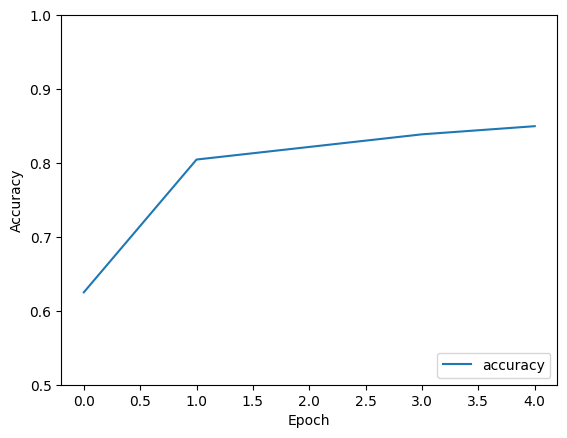

In [113]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [114]:
scores = model.evaluate_generator(test_generator)
scores

C:\Users\vinur\AppData\Local\Temp\ipykernel_14088\2978795028.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


[0.43591994047164917, 0.8395604491233826]